# APRENDIZAJE SUPERVISADO, CLASIFICACION:
- ARBOL DE DECISION --> random forest, se usa cuando tenemos datos que no siguen la normalidad
- K-NEAREST NEIGHBOR
- REGRESION LOGISTICA

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import numpy as np

ABC PARA ALGORITMOS DE MACHINE LEARNING

1. Dividir los datos en x (independientes) , y (dependiente y la que quiero predecir)
2. TRAIN TEST SPLIT (divido el dataset en dos: datros de entrenamiento y datos de prueba que son los que despues voy a contrastar para ver si entreno bien)
3. Traerme el algoritmo quer quiero probar y guardarlo en una varuable
4. FIT / ENTRENAMIENTO de Xtrain e Ytrain
5. PREDECIR la variable target
6. SCORE: ver como performo
- clasificacion: accuracy, precission, fscore, matrix de confusion
- regresion: r2, mae, rmse

### ARBOL DE DECISION

In [5]:
iris = datasets.load_iris() # me traigo dataset externo
X = iris.data #variables independientes
y = iris.target #variables dependientes

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#test depende del tamaño del dataset en general, 
#random_state: semilla de donde arranca, por convension se suele poner en 42

In [7]:
clf = DecisionTreeClassifier(random_state=42) #me traigo el algoritmo
model = clf.fit(X_train, y_train) #entrenamos los datos

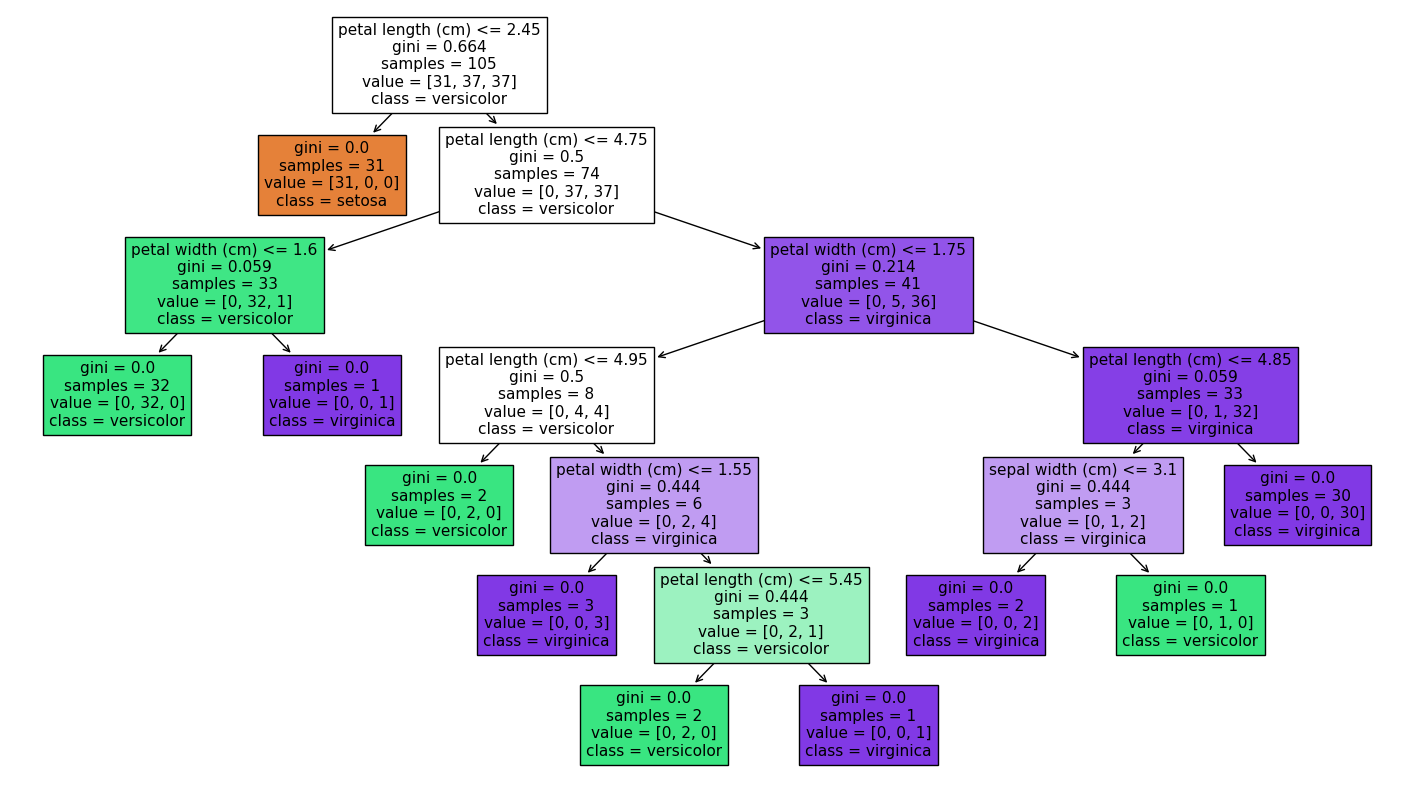

In [9]:
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,feature_names=iris.feature_names,
                   class_names=iris.target_names.tolist(),
                   filled=True)

In [10]:
#PREDECIMOS
pred=model.predict(X_test)

In [11]:
pred #me predice la y

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [13]:
#ACCURACY: que tantos aciertos tuve

from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, pred) #comparo son los datos de y_test contra los predichos #score
accuracy

#como me devuelve 1.0 quiere decir que no tiene errores, 100% de aciertos


1.0

### KNN

In [20]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 13.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [22]:
def knn_comparison(data, k): # funcion de comparacion (se hace en funcion para ir probando con los diferentes valores de j)

  #separa en x e y los datos
  x = data[['X','Y']].values # Extraccion de columns---las variables indep-var depe la que quiero predecir    x=data[['col1', 'col2','col3']]
  y = data['class'].astype(int).values # Clase y como int y=['target']<-- 'mm', clases de tipo entero

  #me guardo el algoritmo en una variable
  clf = neighbors.KNeighborsClassifier(n_neighbors=k) #algoritmo, eleccion de k

  #entrenamiento / fit
  clf.fit(x, y)# Graficar la region de decision

  #graficos
  plot_decision_regions(x, y, clf=clf, legend=2)# Añadir anotaciones
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Knn with K='+ str(k))
  plt.show()

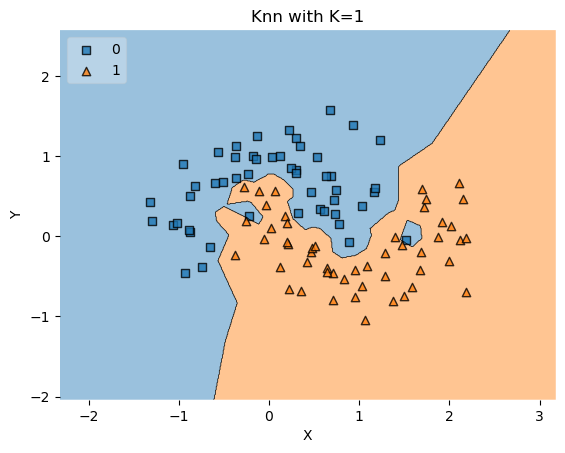

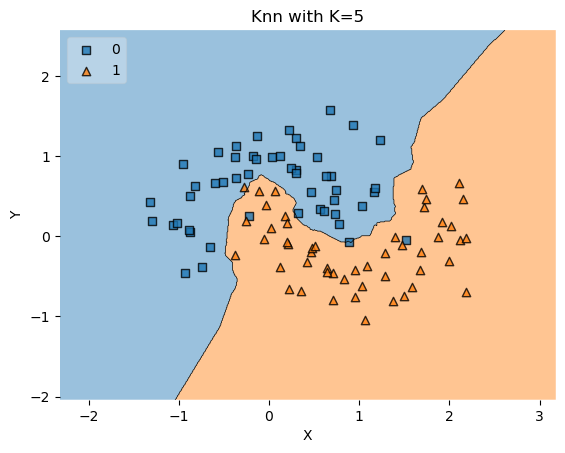

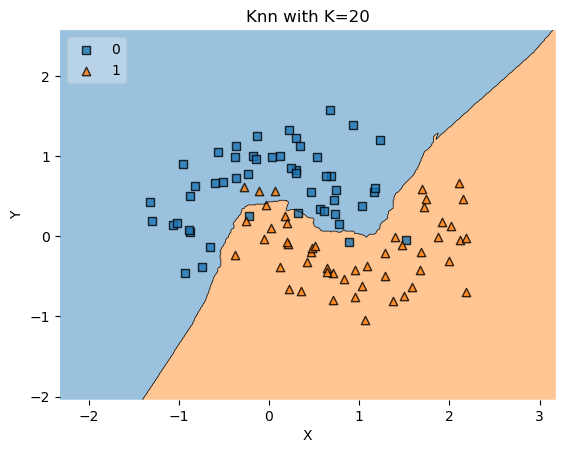

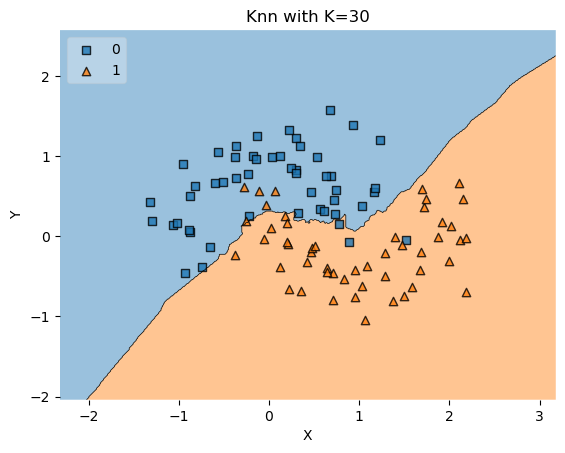

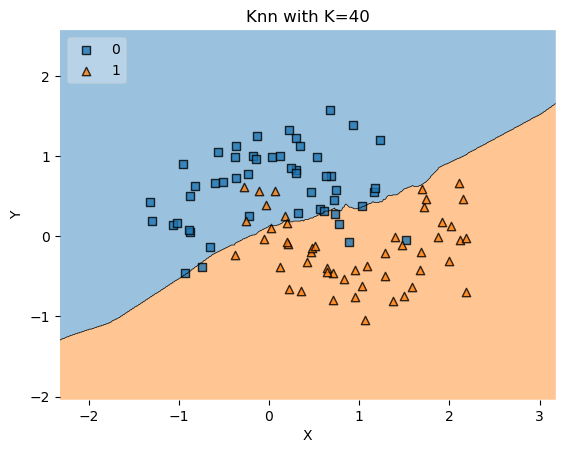

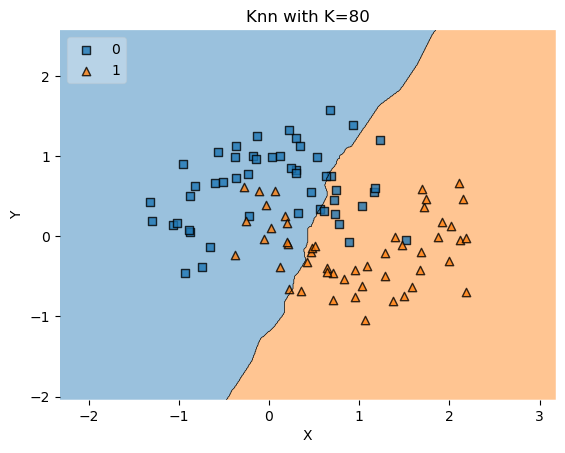

In [23]:
# Cargar y aplicar funcion
data1 = pd.read_csv('C:\\Users\\VICTUS\\Documents\\2024\\DATA SCIENCE\\9. Aprendizaje suoervisado\\ushape.csv')
for i in [1,5,20,30,40,80]: # Para diferentes valores de k (Knn)
    knn_comparison(data1, i)